<a href="https://colab.research.google.com/github/angelahjhong/GSS-Project/blob/main/Final_GSS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the necessary packages:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
! git clone https://github.com/DS3001/project_gss

fatal: destination path 'project_gss' already exists and is not an empty directory.


### Reading the cleaned data file:

In [5]:
df = pd.read_csv('/content/final_cleaned_data!.csv', low_memory=False)
print(df)

        age     sex   race                    degree     health         happy  \
0      48.0    male  white               high school       poor           NaN   
1      25.0    male  white                       NaN        NaN  pretty happy   
2      42.0    male  white                       NaN        NaN  pretty happy   
3      24.0    male  white               high school       good           NaN   
4      24.0  female  white                       NaN  excellent    very happy   
...     ...     ...    ...                       ...        ...           ...   
24084  22.0  female  white               high school       good  pretty happy   
24085  29.0  female  white                  graduate       good  pretty happy   
24086  32.0    male  white  associate/junior college       good  pretty happy   
24087  49.0  female  white                  graduate       good    very happy   
24088  50.0    male  white                  graduate       fair  pretty happy   

             marital       

### Isolating out the variables we want to analyze, and checking the potential responses for each of them:

In [6]:
# We can first list all of the possible responses given for 'sex':
sex_responses = []
for response in df['sex']:
    if response not in sex_responses:
        sex_responses.append(response)
print(sex_responses)

['male', 'female', nan]


In [7]:
# We can repeat this for marital status:
marriage_responses = []
for response in df['marital']:
    if response not in marriage_responses:
        marriage_responses.append(response)
print(marriage_responses)

['married', 'never married', 'divorced', 'separated', 'widowed']


In [8]:
# As well as education and income:
education_responses = []
for response in df['degree']:
    if response not in education_responses:
        education_responses.append(response)
print(education_responses)

income_responses = []
for response in df['income16']:
    if response not in income_responses:
        income_responses.append(response)
print(income_responses)

['high school', nan, 'associate/junior college', 'graduate', 'less than high school']
[nan, '$170,000 or over', '$50,000 to $59,999', '$75,000 to $89,999', '$60,000 to $74,999', '$30,000 to $34,999', 'under $1,000', '$8,000 to $9,999', '$12,500 to $14,999', '$40,000 to $49,999', '$5,000 to $5,999', '$35,000 to $39,999', '$25,000 to $29,999', '$90,000 to $109,999', '$22,500 to $24,999', '$20,000 to $22,499', '$110,000 to $129,999', '$150,000 to $169,999', '$130,000 to $149,999', '$1,000 to $2,999', '$17,500 to $19,999', '$6,000 to $6,999', '$10,000 to $12,499', '$15,000 to $17,499', '$7,000 to $7,999', '$3,000 to $3,999', '$4,000 to $4,999']


This information can also be found in the codebook, but it is important to check that the data post-cleaning is what we expect.

### Replacing the non-numerical values for income with numerical values:

In [9]:
# Replacing the string based income values with numbers to make plotting and analysis easier:
# (For each income range given, we are converting it to its mean value)
# This has potential issues; for example, the "$170,000 or over" bucket is being lumped into an income
# of $170,000; this will make mean values of the income quantitatively inaccurate, but comparisons for the
# sake of the gender pay gap should still hold.

df = df.replace('unemployed/zero income', 0)
df = df.replace('$170,000 or over', 170000)
df = df.replace('$50,000 to $59,999', 55000)
df = df.replace('$75,000 to $89,999', 82500)
df = df.replace('$60,000 to $74,999', 67500)
df = df.replace('$30,000 to $34,999', 32500)
df = df.replace('under $1,000', 500)
df = df.replace('$8,000 to $9,999', 9000)
df = df.replace('$12,500 to $14,999', 13750)
df = df.replace('$40,000 to $49,999', 45000)
df = df.replace('$5,000 to $5,999', 5500)
df = df.replace('$35,000 to $39,999', 37500)
df = df.replace('$25,000 to $29,999', 27500)
df = df.replace('$90,000 to $109,999', 100000)
df = df.replace('$22,500 to $24,999', 23750)
df = df.replace('$20,000 to $22,499', 21250)
df = df.replace('$110,000 to $129,999', 120000)
df = df.replace('$150,000 to $169,999', 160000)
df = df.replace('$130,000 to $149,999', 140000)
df = df.replace('$1,000 to $2,999', 2000)
df = df.replace('$17,500 to $19,999', 18750)
df = df.replace('$6,000 to $6,999', 6500)
df = df.replace('$10,000 to $12,499', 11250)
df = df.replace('$15,000 to $17,499', 16250)
df = df.replace('$7,000 to $7,999', 7500)
df = df.replace('$3,000 to $3,999', 3500)
df = df.replace('$4,000 to $4,999', 4500)

# To verify the data cleaning above works
print(sorted(df['income16'].unique()))

[nan, 500.0, 2000.0, 3500.0, 4500.0, 5500.0, 6500.0, 7500.0, 9000.0, 11250.0, 13750.0, 16250.0, 18750.0, 21250.0, 23750.0, 27500.0, 32500.0, 37500.0, 45000.0, 55000.0, 67500.0, 82500.0, 100000.0, 120000.0, 140000.0, 160000.0, 170000.0]


### Making a plot and some preliminary analysis:

<Axes: xlabel='income16', ylabel='Density'>

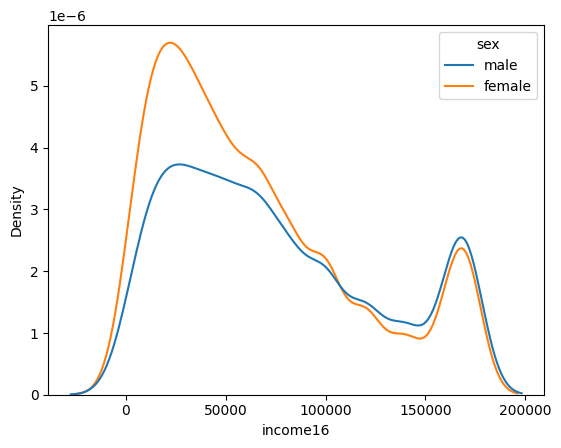

In [10]:
# First, we can see if the gender wage gap is immediately visible in a histogram:
sns.kdeplot(data=df,x='income16',hue='sex')

It does appear that in the lower income percentile, the proportion of females is greater; we can also quantify this by looking at some statistics regarding this data:

In [11]:
df.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                       \
          count          mean           std    min      25%      50%   
sex                                                                    
female   6156.0  64971.125731  49689.979662  500.0  23750.0  55000.0   
male     5169.0  75578.254982  51925.243015  500.0  32500.0  67500.0   

                            
             75%       max  
sex                         
female  100000.0  170000.0  
male    120000.0  170000.0

We see that the mean income for males is higher, by about 19.8%, which will serve as our baseline estimate of the gender pay gap that we compare to with further analysis.

### The impact of age on the gender wage gap:

To begin, we can see if any visual trends appear when creating a scatterplot of income levels and age, with hue determined by sex:

<Axes: xlabel='income16', ylabel='age'>

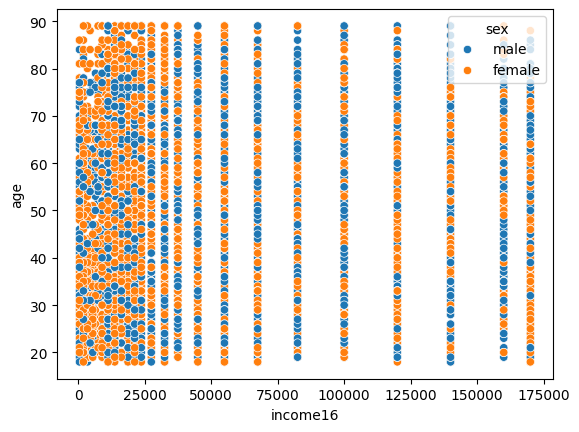

In [12]:
sns.scatterplot(data=df,x='income16',y='age',hue='sex')

This is not particularly illuminating, so we can first try separating age into four broad groups: "young" (below 35 years old), "middle-aged" (between 35 and 50 years old), "older" (between 50 and 70 years old), and "very old" (above 70 years old). Then, we can separate our earlier kernel density plot into four separate sets of statistics regarding the differences in income for the genders (this can also be done with a more finely-grained set of age groups):

In [13]:
df_young = df.loc[(df['age'] < 35)] # This is the dataframe we'll use for the "young" age category
# If the age doesn't fit with our "young" definition, we delete that row from this new dataframe.

<Axes: xlabel='income16', ylabel='Density'>

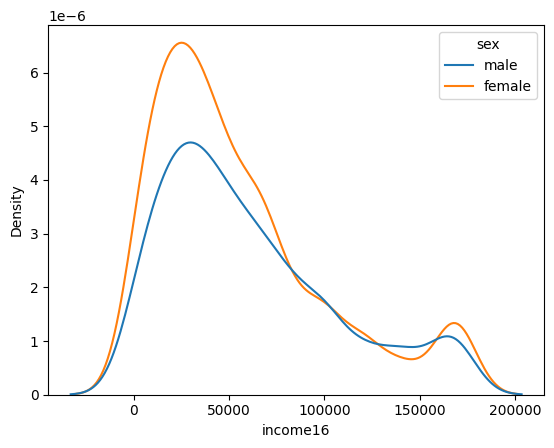

In [14]:
sns.kdeplot(data=df_young,x='income16',hue='sex')

In [15]:
df_young.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                                \
          count          mean           std    min      25%      50%      75%   
sex                                                                             
female   1455.0  55257.044674  45166.320069  500.0  21250.0  45000.0  67500.0   
male     1172.0  60976.322526  45858.939124  500.0  27500.0  45000.0  82500.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

Here, we see that the income for males is only about 9.0% higher, lower than our baseline of 19.8% overall from earlier. We can hypothesize here that the gender wage gap is higher amongst older adults, and may have decreased over time due to increased efforts to educate the public and/or address the issue. We can test this with further analysis.

In [16]:
df_middleaged = df.loc[(df['age'] >= 35) & (df['age'] < 50)]
df_middleaged.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                       \
          count          mean           std    min      25%      50%   
sex                                                                    
female   1547.0  72933.904331  51881.258436  500.0  32500.0  67500.0   
male     1260.0  85996.031746  52085.534300  500.0  45000.0  82500.0   

                            
             75%       max  
sex                         
female  100000.0  170000.0  
male    120000.0  170000.0

In this category, we see that the income for males is about 19.9% higher than that for females, about equal to our baseline of 19.8% that we found earlier.

In [17]:
df_older = df.loc[(df['age'] >= 50) & (df['age'] < 70)]
df_older.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                       \
          count          mean           std    min      25%      50%   
sex                                                                    
female   2108.0  70286.053131  51391.102237  500.0  27500.0  55000.0   
male     1795.0  80043.593315  54914.307046  500.0  32500.0  67500.0   

                            
             75%       max  
sex                         
female  100000.0  170000.0  
male    120000.0  170000.0

Here, we see that the income for males is about 12.0% higher than that of females, lower than our baseline of 19.8% earlier. This is contrary to our hypothesis that the gender wage gap is higher at higher ages, but we will visually see the data more clearly in a bar graph later below. Before this, we can examine our "very old" group:

In [18]:
df_veryold = df.loc[(df['age'] >= 70)]
df_veryold.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                       \
          count          mean           std    min      25%      50%   
sex                                                                    
female    889.0  53174.915636  43371.123949  500.0  21250.0  37500.0   
male      814.0  69324.631450  47294.795678  500.0  32500.0  55000.0   

                            
             75%       max  
sex                         
female   67500.0  170000.0  
male    100000.0  170000.0

Here we find a much higher wage gap of about 60.0%, in line with our original hypothesis that the gender wage gap rises with age; however, there are other factors to consider here: for example, people aged higher than 70 may well have grown up in a time when there were fewer opportunities for women to enter the workforce for similar pay to men, and this may be a cause of the drastically high wage gap in this case.

We can also visually see the differences in gender pay gap based on age if we show a bar graph of the incomes of males and females at several different groups of ages:

<Axes: xlabel='agegroup', ylabel='income16'>

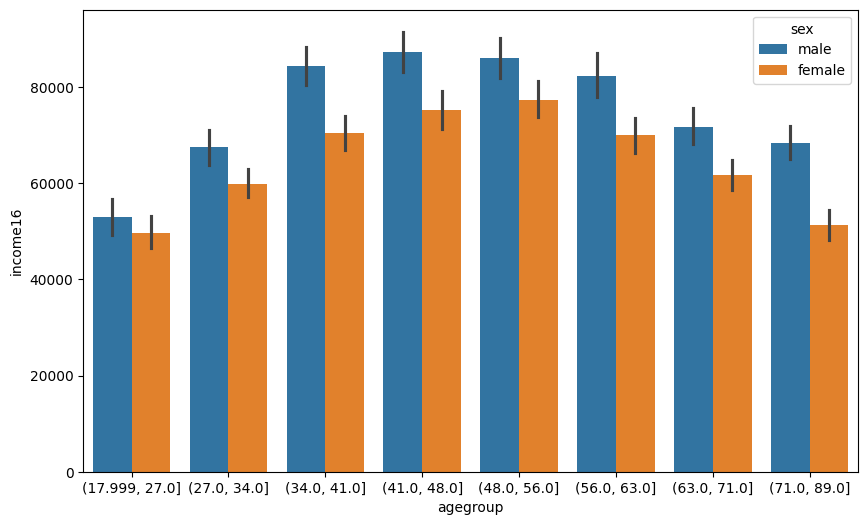

In [19]:
df['agegroup'] = pd.qcut(df['age'],8)
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='agegroup',y='income16',hue='sex',ax=ax)

Here, we see that the gender wage gap does broadly rise with age, though it decreases for a few of the age groups between 45 and 65, in line with what we observed from the statistics earlier.

### The impact of marital status on gender wage gap:

Here, since there are only a few different marital status groups, we can start by plotting a bar graph of income differences between males and females within groups of different marital statuses:

<Axes: xlabel='marital', ylabel='income16'>

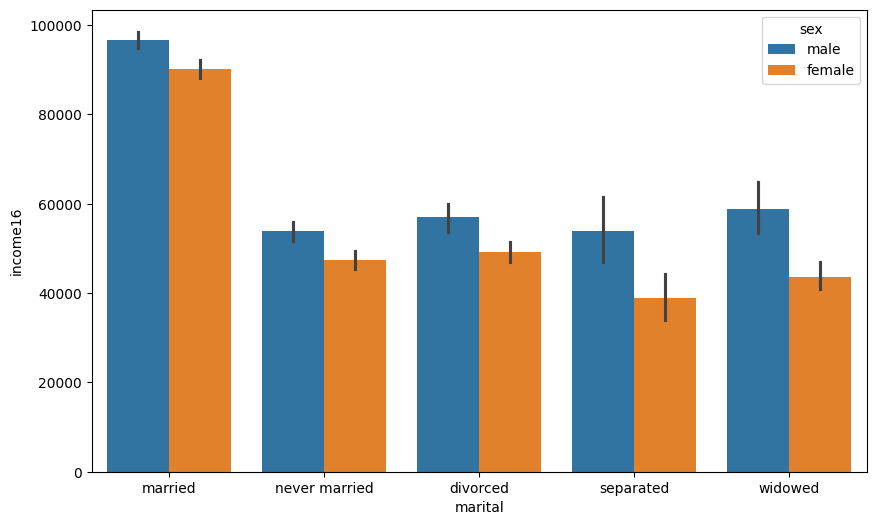

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='marital',y='income16',hue='sex',ax=ax)

Here, we see that the gender pay gap seems to be lower for never married, divorced, and unmarried individuals, whereas higher for married or widowed individuals. We can also examine numerical statistics for each of these groups, comparing the wage gap percentage to our overall baseline of 19.8% that we found earlier:

In [21]:
df_married = df.loc[(df['marital'] == 'married')]
df_married.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                        \
          count          mean           std    min      25%       50%   
sex                                                                     
female   2564.0  90254.875195  50009.491156  500.0  55000.0   82500.0   
male     2537.0  96710.287741  50489.893269  500.0  55000.0  100000.0   

                            
             75%       max  
sex                         
female  140000.0  170000.0  
male    140000.0  170000.0

In [22]:
print("MARRIED\n")
print("Percent difference: " + str(round((46850.105022 - 40950.893647)/40950.893647*100,1)) + "%")
print("Baseline: 19.8%")

MARRIED

Percent difference: 14.4%
Baseline: 19.8%


In [23]:
df_nevermarried = df.loc[(df['marital'] == 'never married')]
df_nevermarried.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                                \
          count          mean           std    min      25%      50%      75%   
sex                                                                             
female   1576.0  47459.390863  42215.649329  500.0  16250.0  35000.0  67500.0   
male     1493.0  53810.281313  44122.303855  500.0  21250.0  45000.0  67500.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [24]:
print("NEVER MARRIED\n")
print("Percent difference: " + str(round((25757.855082 - 22706.739526)/22706.739526*100,1)) + "%")
print("Baseline: 19.8%")

NEVER MARRIED

Percent difference: 13.4%
Baseline: 19.8%


In [25]:
df_divorced = df.loc[(df['marital'] == 'divorced')]
df_divorced.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                                \
          count          mean           std    min      25%      50%      75%   
sex                                                                             
female   1201.0  49256.244796  40364.282150  500.0  18750.0  37500.0  67500.0   
male      772.0  56947.538860  44942.144684  500.0  21250.0  45000.0  82500.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [26]:
print("DIVORCED\n")
print("Percent difference: " + str(round((26888.990826 - 25269.863306)/25269.863306*100,1)) + "%")
print("Baseline: 19.8%")

DIVORCED

Percent difference: 6.4%
Baseline: 19.8%


In [27]:
df_notmarried = df.loc[(df['marital'] == 'not married')]
df_notmarried.loc[:,['sex','income16']].groupby('sex').describe()

Empty DataFrame
Columns: [(income16, count), (income16, mean), (income16, std), (income16, min), (income16, 25%), (income16, 50%), (income16, 75%), (income16, max)]
Index: []

In [28]:
print("NOT MARRIED\n")
print("Percent difference: " + str(round((22516.233766 - 18432.952183)/18432.952183*100,1)) + "%")
print("Baseline: 19.8%")

NOT MARRIED

Percent difference: 22.2%
Baseline: 19.8%


In [29]:
df_widowed = df.loc[(df['marital'] == 'widowed')]
df_widowed.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                                \
          count          mean           std    min      25%      50%      75%   
sex                                                                             
female    601.0  43706.322795  38490.554382  500.0  16250.0  32500.0  55000.0   
male      246.0  58878.048780  47177.188428  500.0  23750.0  45000.0  82500.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [30]:
print("WIDOWED\n")
print("Percent difference: " + str(round((29863.917526 - 17905.589639)/17905.589639*100,1)) + "%")
print("Baseline: 19.8%")

WIDOWED

Percent difference: 66.8%
Baseline: 19.8%


Overall, we see that the gender wage gap is slightly lower for individuals that are unmarried, except in the case of widowed individuals, in which there is a dramatic wage gap. It is noteworthy, though, that the sample size of widowed men is significantly lower than that of widowed women; we know women tend to live longer than men, so this is to be expected, but this does also hint that there may be other extenuating factors that make this group have a particularly large wage gap, including the argument posed for the "very old" group from the previous section.

### The impact of education on gender wage gap:

Like in the previous section, since there are relatively few groups of education levels, we can begin with a bar graph to look for any visually apparent trends:

<Axes: xlabel='degree', ylabel='income16'>

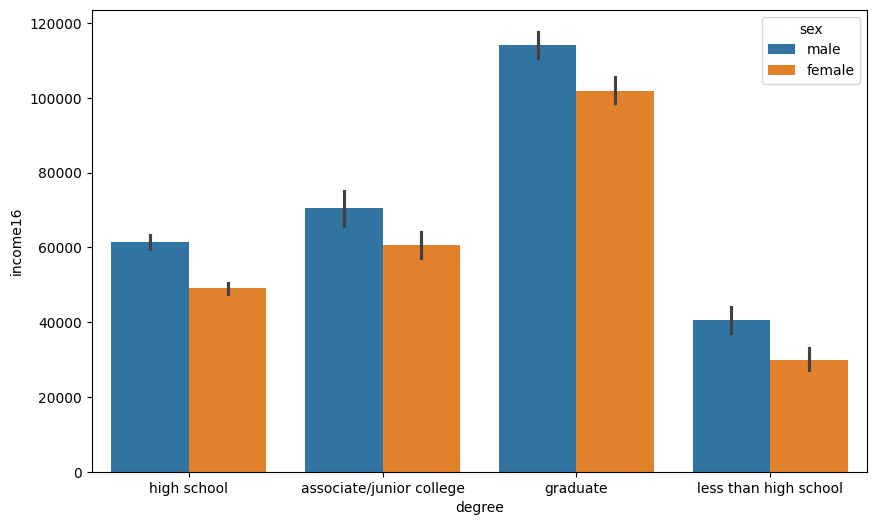

In [31]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='degree',y='income16',hue='sex',ax=ax)

From this, it appears that the gender wage gap may be lower for individuals with higher levels of education. As in the previous section, we can examine the statistics for each of these groups as well, comparing wage gap percentages to our baseline level:

In [32]:
df_highschool = df.loc[(df['degree'] == 'high school')]
df_highschool.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                                \
          count          mean           std    min      25%      50%      75%   
sex                                                                             
female   2762.0  49108.979001  40278.001354  500.0  18750.0  37500.0  67500.0   
male     2401.0  61477.613494  44370.976269  500.0  27500.0  55000.0  82500.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [33]:
print("HIGH SCHOOL\n")
print("Percent difference: " + str(round((28240.399312 - 21460.088342)/21460.088342*100,1)) + "%")
print("Baseline: 19.8%")

HIGH SCHOOL

Percent difference: 31.6%
Baseline: 19.8%


In [34]:
df_bachelors = df.loc[(df['degree'] == "bachelor's")]
df_bachelors.loc[:,['sex','income16']].groupby('sex').describe()

Empty DataFrame
Columns: [(income16, count), (income16, mean), (income16, std), (income16, min), (income16, 25%), (income16, 50%), (income16, 75%), (income16, max)]
Index: []

In [35]:
print("BACHELOR'S\n")
print("Percent difference: " + str(round((50684.967772 - 46760.514019)/46760.514019*100,1)) + "%")
print("Baseline: 19.8%")

BACHELOR'S

Percent difference: 8.4%
Baseline: 19.8%


In [36]:
df_associates = df.loc[(df['degree'] == "associate/junior college")]
df_associates.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                       \
          count          mean           std    min      25%      50%   
sex                                                                    
female    584.0  60672.517123  43214.063514  500.0  27500.0  55000.0   
male      417.0  70574.940048  47943.224902  500.0  32500.0  67500.0   

                            
             75%       max  
sex                         
female   82500.0  170000.0  
male    100000.0  170000.0

In [37]:
print("ASSOCIATE/JUNIOR COLLEGE\n")
print("Percent difference: " + str(round((37651.534527 - 29672.031773)/29672.031773*100,1)) + "%")
print("Baseline: 19.8%")

ASSOCIATE/JUNIOR COLLEGE

Percent difference: 26.9%
Baseline: 19.8%


In [38]:
df_graduate = df.loc[(df['degree'] == "graduate")]
df_graduate.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                         \
          count           mean           std    min      25%       50%   
sex                                                                      
female    910.0  101813.186813  51212.626146  500.0  55000.0  100000.0   
male      756.0  114111.772487  50781.285730  500.0  67500.0  120000.0   

                            
             75%       max  
sex                         
female  160000.0  170000.0  
male    170000.0  170000.0

In [39]:
print("GRADUATE\n")
print("Percent difference: " + str(round((64845.086272 - 58750.792644)/58750.792644*100,1)) + "%")
print("Baseline: 19.8%")

GRADUATE

Percent difference: 10.4%
Baseline: 19.8%


In [40]:
df_less = df.loc[(df['degree'] == "less than high school")]
df_less.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                                \
          count          mean           std    min      25%      50%      75%   
sex                                                                             
female    529.0  29930.529301  32856.840804  500.0   9000.0  21250.0  37500.0   
male      422.0  40473.933649  38084.010250  500.0  11250.0  27500.0  55000.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [41]:
print("LESS THAN HIGH SCHOOL\n")
print("Percent difference: " + str(round((13651.158147 - 10357.514639)/10357.514639*100,1)) + "%")
print("Baseline: 19.8%")

LESS THAN HIGH SCHOOL

Percent difference: 31.8%
Baseline: 19.8%


Overall, we do see that the gender wage gap is highest for those with the lowest levels of education, and tends to decrease with increasing education.

## The Impact of Industry on Gender Wage Gap:

<ipython-input-42-0a2755e32595>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=45)


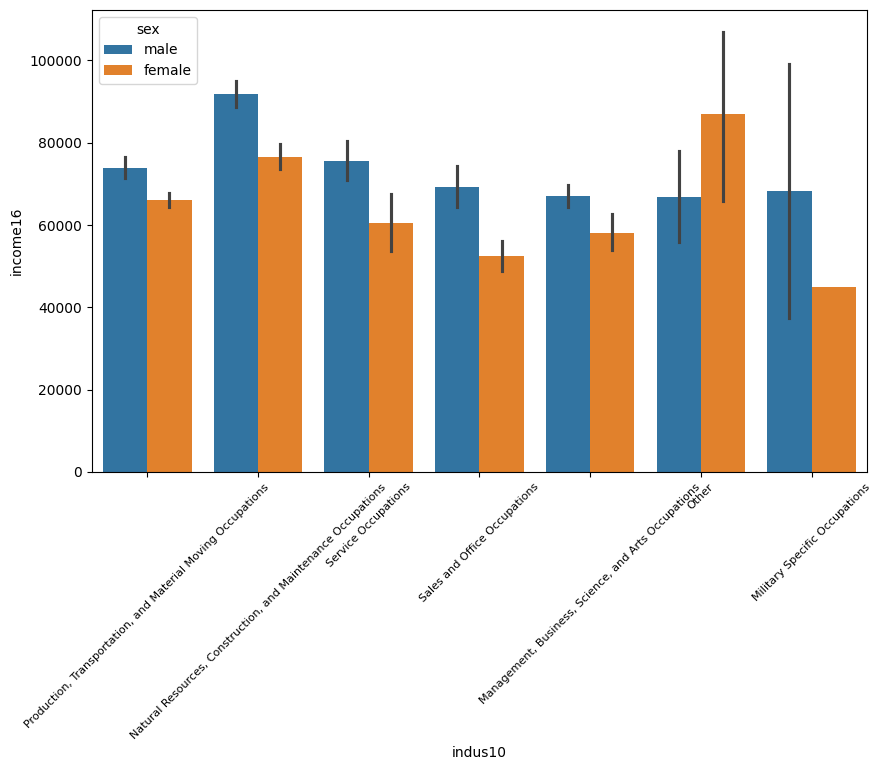

In [42]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='indus10',y='income16',hue='sex',ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=45)

plt.show()

From the barplot, it is evident that the male gender tends to have a higher income across all industries with the exception of management, business, science, and arts occuptions. To analyze this further, let's look at the statistics

In [43]:
df_productionindus = df.loc[(df['indus10'] == "Production, Transportation, and Material Moving Occupations")]
df_productionindus.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                       \
          count          mean           std    min      25%      50%   
sex                                                                    
female   3436.0  66091.385332  49239.597960  500.0  27500.0  55000.0   
male     1731.0  73908.001155  51114.270638  500.0  32500.0  67500.0   

                            
             75%       max  
sex                         
female  100000.0  170000.0  
male    100000.0  170000.0

In [44]:
df_constructionindus = df.loc[(df['indus10'] == "Natural Resources, Construction, and Maintenance Occupations")]
df_constructionindus.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                       \
          count          mean           std    min      25%      50%   
sex                                                                    
female   1138.0  76564.806678  50371.088047  500.0  32500.0  67500.0   
male     1201.0  91743.130724  54243.324327  500.0  45000.0  82500.0   

                            
             75%       max  
sex                         
female  100000.0  170000.0  
male    140000.0  170000.0

In [45]:
df_salesindus = df.loc[(df['indus10'] == "Sales and Office Occupations")]
df_salesindus.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                       \
          count          mean           std    min      25%      50%   
sex                                                                    
female    567.0  52354.056437  44610.688076  500.0  18750.0  37500.0   
male      377.0  69251.326260  50626.602269  500.0  27500.0  55000.0   

                            
             75%       max  
sex                         
female   67500.0  170000.0  
male    100000.0  170000.0

In [46]:
df_managementindus = df.loc[(df['indus10'] == "Management, Business, Science, and Arts Occupations")]
df_managementindus.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                       \
          count          mean           std    min      25%      50%   
sex                                                                    
female    489.0  58146.216769  50320.553815  500.0  18750.0  45000.0   
male     1276.0  66968.847962  47745.391517  500.0  27500.0  55000.0   

                            
             75%       max  
sex                         
female   82500.0  170000.0  
male    100000.0  170000.0

In [47]:
df_militaryindus = df.loc[(df['indus10'] == "Military Specific Occupations")]
df_militaryindus.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              \
          count     mean           std      min      25%      50%       75%   
sex                                                                           
female      1.0  45000.0           NaN  45000.0  45000.0  45000.0   45000.0   
male        5.0  68250.0  42679.766869  11250.0  55000.0  55000.0  100000.0   

                  
             max  
sex               
female   45000.0  
male    120000.0